# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
!pip install citipy
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [56]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kaeo
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | igurusi
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | havoysund
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | hami
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | coalcoman
City not found. Skipping...
Processing Record 11 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 1 | raga
Processing Record 15 of Set 1 | leningradskiy
Processing Record 16 of Set 1 | chuy
Processing Record 17 of Set 1 | tullahoma
Processing Record 18 of Set 1 | antofagasta
Processing Record 19 of Set 1 | javanrud
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | butarit

Processing Record 35 of Set 4 | ponta do sol
Processing Record 36 of Set 4 | fethiye
Processing Record 37 of Set 4 | sistranda
Processing Record 38 of Set 4 | acapulco
Processing Record 39 of Set 4 | presidencia roque saenz pena
Processing Record 40 of Set 4 | atar
Processing Record 41 of Set 4 | ornskoldsvik
Processing Record 42 of Set 4 | san lorenzo
Processing Record 43 of Set 4 | geraldton
Processing Record 44 of Set 4 | san policarpo
Processing Record 45 of Set 4 | dikson
Processing Record 46 of Set 4 | amderma
City not found. Skipping...
Processing Record 47 of Set 4 | bathsheba
Processing Record 48 of Set 4 | jiangyou
Processing Record 49 of Set 4 | ndouci
City not found. Skipping...
Processing Record 0 of Set 5 | kasongo-lunda
Processing Record 1 of Set 5 | rudnichnyy
Processing Record 2 of Set 5 | tungkang
City not found. Skipping...
Processing Record 3 of Set 5 | xinmin
Processing Record 4 of Set 5 | juybar
Processing Record 5 of Set 5 | ostersund
Processing Record 6 of Set 5

Processing Record 25 of Set 8 | camacha
Processing Record 26 of Set 8 | solwezi
Processing Record 27 of Set 8 | peddapalli
Processing Record 28 of Set 8 | mogadishu
Processing Record 29 of Set 8 | ancud
Processing Record 30 of Set 8 | puerto el triunfo
Processing Record 31 of Set 8 | kudahuvadhoo
Processing Record 32 of Set 8 | kenai
Processing Record 33 of Set 8 | menongue
Processing Record 34 of Set 8 | japura
Processing Record 35 of Set 8 | esperance
Processing Record 36 of Set 8 | ouesso
Processing Record 37 of Set 8 | yurga
Processing Record 38 of Set 8 | honggang
Processing Record 39 of Set 8 | raton
Processing Record 40 of Set 8 | ocos
Processing Record 41 of Set 8 | rawah
Processing Record 42 of Set 8 | sao gabriel da cachoeira
Processing Record 43 of Set 8 | iracoubo
Processing Record 44 of Set 8 | simbahan
Processing Record 45 of Set 8 | vanimo
Processing Record 46 of Set 8 | la ronge
Processing Record 47 of Set 8 | rawson
Processing Record 48 of Set 8 | edirne
Processing Rec

Processing Record 14 of Set 12 | banda aceh
Processing Record 15 of Set 12 | karaul
City not found. Skipping...
Processing Record 16 of Set 12 | manavalakurichi
Processing Record 17 of Set 12 | salaga
Processing Record 18 of Set 12 | turayf
Processing Record 19 of Set 12 | manicore
Processing Record 20 of Set 12 | zlynka
Processing Record 21 of Set 12 | guanica
Processing Record 22 of Set 12 | lorengau
Processing Record 23 of Set 12 | massakory
Processing Record 24 of Set 12 | statesboro
Processing Record 25 of Set 12 | padang
Processing Record 26 of Set 12 | coihaique
Processing Record 27 of Set 12 | medea
Processing Record 28 of Set 12 | anadyr
Processing Record 29 of Set 12 | ust-nera
Processing Record 30 of Set 12 | porosozero
Processing Record 31 of Set 12 | university park
Processing Record 32 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 33 of Set 12 | lewistown
Processing Record 34 of Set 12 | pandan
Processing Record 35 of Set 12 | el vigia
Processing Re

In [57]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [58]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kaeo,-35.1000,173.7833,20.74,73,87,3.17,NZ,1669935870
1,punta arenas,-53.1500,-70.9167,10.35,69,100,8.71,CL,1669935871
2,igurusi,-8.8500,33.8500,17.40,88,98,0.42,TZ,1669935871
3,hobart,-42.8794,147.3294,17.92,62,20,3.60,AU,1669935622
4,rikitea,-23.1203,-134.9692,23.72,76,100,4.43,PF,1669935517


In [59]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [60]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kaeo,-35.1000,173.7833,20.74,73,87,3.17,NZ,1669935870
1,punta arenas,-53.1500,-70.9167,10.35,69,100,8.71,CL,1669935871
2,igurusi,-8.8500,33.8500,17.40,88,98,0.42,TZ,1669935871
3,hobart,-42.8794,147.3294,17.92,62,20,3.60,AU,1669935622
4,rikitea,-23.1203,-134.9692,23.72,76,100,4.43,PF,1669935517


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

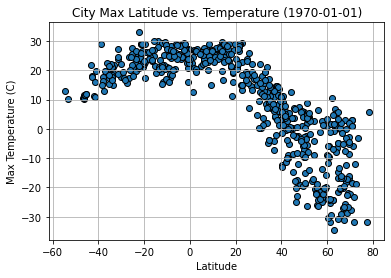

In [61]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors="black")

# Incorporate the other graph properties
city_data_df['Date'] = pd.to_datetime(city_data_df['Date'])
dateconvert = city_data_df['Date'].dt.date
plt.title(f'City Max Latitude vs. Temperature ({dateconvert[0]})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

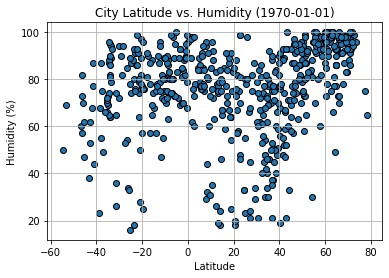

In [62]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors="black")

# Incorporate the other graph properties

plt.title(f'City Latitude vs. Humidity ({dateconvert[0]})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

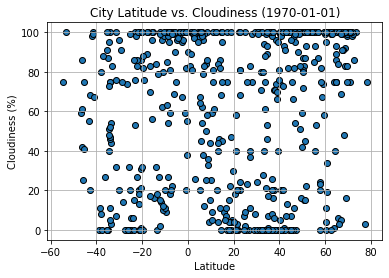

In [63]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors="black")

# Incorporate the other graph properties

plt.title(f'City Latitude vs. Cloudiness ({dateconvert[0]})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

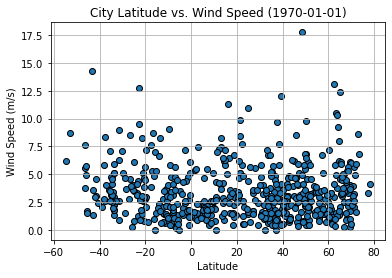

In [64]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors="black")

# Incorporate the other graph properties

plt.title(f'City Latitude vs. Wind Speed ({dateconvert[0]})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [65]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_values * slope + intercept

In [66]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,havoysund,70.9963,24.6622,3.13,91,99,3.20,NO,1970-01-01 00:00:01.669935874
7,hami,42.8000,93.4500,-8.88,21,100,0.72,CN,1970-01-01 00:00:01.669935417
10,raga,8.4596,25.6780,25.25,32,100,1.37,SS,1970-01-01 00:00:01.669935878
11,leningradskiy,69.3833,178.4167,-2.87,83,100,4.00,RU,1970-01-01 00:00:01.669935743
13,tullahoma,35.3620,-86.2094,7.04,46,0,2.06,US,1970-01-01 00:00:01.669935617


In [67]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kaeo,-35.1000,173.7833,20.74,73,87,3.17,NZ,1970-01-01 00:00:01.669935870
1,punta arenas,-53.1500,-70.9167,10.35,69,100,8.71,CL,1970-01-01 00:00:01.669935871
2,igurusi,-8.8500,33.8500,17.40,88,98,0.42,TZ,1970-01-01 00:00:01.669935871
3,hobart,-42.8794,147.3294,17.92,62,20,3.60,AU,1970-01-01 00:00:01.669935622
4,rikitea,-23.1203,-134.9692,23.72,76,100,4.43,PF,1970-01-01 00:00:01.669935517


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.702245485017087


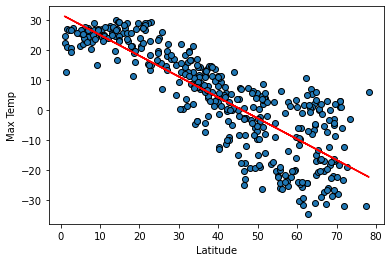

In [68]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_values * slope + intercept

print(f"The r-value is: {rvalue**2}")

# Incorporate the other graph properties
plt.scatter(x_values, y_values, edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,245), xycoords = 'data',fontsize=15,color="red")


plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

The r-value is: 0.39518620247359637


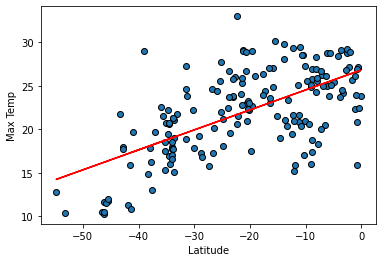

In [69]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_values * slope + intercept

print(f"The r-value is: {rvalue**2}")

# Incorporate the other graph properties
plt.scatter(x_values, y_values, edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,305), xycoords = 'data',fontsize=15,color="red")


plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

**Discussion about the linear relationship:** 
1. Regarding the northern hemisphere, latitude and max temperature seems negatively correlated, with the r-value of 0.7. In other words, it is reasonable to assume that the higher the latitude, the lower the maximum temperature.

2. On the other hand, latitude and temperature in the southern hemisphere do not seem to have a strong correlation, postive nor negative. However, the regression line does increase, which entails that it is reasonable to roughly estimate an increase in temperature as latitude increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.15311301318987278


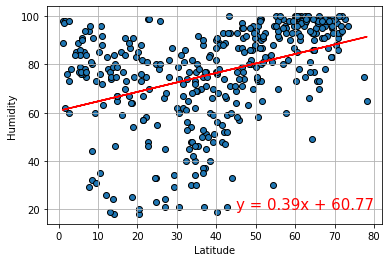

In [70]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_values * slope + intercept

print(f"The r-value is: {rvalue**2}")

# Incorporate the other graph properties
plt.scatter(x_values, y_values, edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20), xycoords = 'data',fontsize=15,color="red")

# Incorporate the other graph properties

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()

The r-value is: 0.1133257841268522


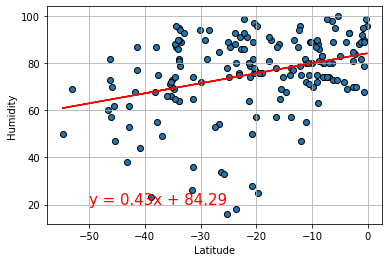

In [72]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_values * slope + intercept

print(f"The r-value is: {rvalue**2}")

# Incorporate the other graph properties
plt.scatter(x_values, y_values, edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20), xycoords = 'data',fontsize=15,color="red")

# Incorporate the other graph properties

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()

**Discussion about the linear relationship:** 

Both plots suggest that humidity is not related to latitude. Both hemispheres have an r-value of 0.1, meaning the correlation is marginal. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.07683982508430179


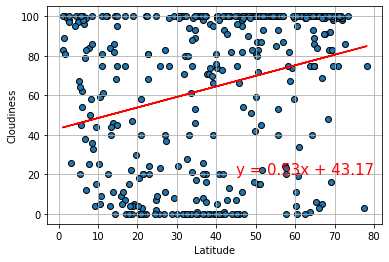

In [73]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_values * slope + intercept

print(f"The r-value is: {rvalue**2}")

# Incorporate the other graph properties
plt.scatter(x_values, y_values, edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20), xycoords = 'data',fontsize=15,color="red")

# Incorporate the other graph properties

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()

The r-value is: 0.056945538771816115


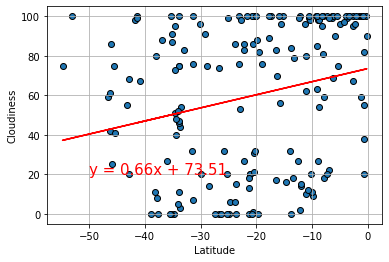

In [74]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_values * slope + intercept

print(f"The r-value is: {rvalue**2}")

# Incorporate the other graph properties
plt.scatter(x_values, y_values, edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20), xycoords = 'data',fontsize=15,color="red")

# Incorporate the other graph properties

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()

**Discussion about the linear relationship:**

Similar to latitude vs. humidity, cloudiness is nearly irrelevant to latitude, both in the northern and southern hemispheres, as proven by the r-values (0.04 and 0.1, respectively).

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.006662574446637105


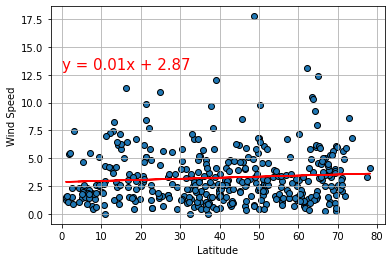

In [75]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_values * slope + intercept

print(f"The r-value is: {rvalue**2}")

# Incorporate the other graph properties
plt.scatter(x_values, y_values, edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0, 13), xycoords = 'data',fontsize=15,color="red")

# Incorporate the other graph properties

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()

The r-value is: 0.0784259090606546


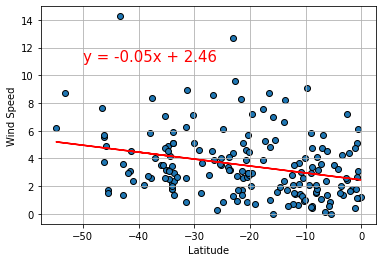

In [76]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_values * slope + intercept

print(f"The r-value is: {rvalue**2}")

# Incorporate the other graph properties
plt.scatter(x_values, y_values, edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,11), xycoords = 'data',fontsize=15,color="red")

# Incorporate the other graph properties

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()

**Discussion about the linear relationship:** 

Wind speed has no correlation with latitude. Though the slop of wind speed vs. latitude in the southern hemisphere runs downward, the relation is too insignificant to assume numbers outside the range. 